# 株価の予測

・機械学習を用いて株価を予測

・データは調整後終値を使用

・python

・scikit-learn

====== 手順 ======

1. データを収集

2. データの前処理

3. 学習データとテストデータを作成

4. 学習

5. 評価

6. 予測 <<<--- ココ

# 1. データの収集

# csvファイルの読み込み

In [289]:
import pandas as pd
df = pd.read_csv('kabuka.csv')

# データの可視化

In [290]:
df.head()

,day,value
0,2017/1/4,7097
1,2017/1/5,7049
2,2017/1/6,6930
3,2017/1/10,6861
4,2017/1/11,6912


In [291]:
df.tail()

,day,value
158,2017/8/23,6173
159,2017/8/24,6107
160,2017/8/25,6158
161,2017/8/28,6126
162,2017/8/29,6090


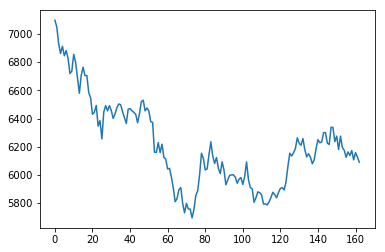

In [292]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.plot(np.arange(len(df['day'])), df['value'])

# 2. データの前処理

前日との比のデータ -> train_X

1term後、翌日が前日と比べて上がったか(1)下がったか(0)のデータ -> train_Y

In [293]:
# 前日との比率
data = df['value'].pct_change().values
print('data type:', type(data))
data = np.delete(data, 0)

print('data:\n', data)

# 8割を学習用、2割をテスト用
# div が区切りの番号
print('\nlength:', len(data))
div = int(len(data) * 0.8)
print('div:', div)

train_data = data[0:div]
print('\ntrain_data:\n', train_data)
test_data = data[div:]
print('\ntest_data:\n', test_data)

data type: <class 'numpy.ndarray'>
data:
 [-0.00676342 -0.01688183 -0.00995671  0.00743332 -0.00969329  0.00540541
 -0.00799186 -0.01581954  0.00253014  0.01766627 -0.00787746 -0.01632113
 -0.01659193  0.01930385  0.00864897 -0.00887049  0.00014916 -0.01804623
 -0.00577157 -0.01772075  0.00233281  0.00744763 -0.02263977  0.0061456
 -0.02036022  0.03053557  0.00698107 -0.0057002   0.00573288 -0.00523802
 -0.00882763  0.005       0.00715174  0.00385922 -0.00076888 -0.00769468
 -0.00651365 -0.00640025  0.01586803  0.00061862 -0.00231839 -0.00170411
 -0.00217256 -0.00933126  0.0100471   0.01336649  0.00153374 -0.01163859
  0.0032538  -0.00339768 -0.01177747 -0.00062725 -0.03326534 -0.00016231
  0.0112013  -0.0113983   0.00974342 -0.0151174  -0.0021228  -0.01129111
  0.00066203 -0.01025471 -0.01253342 -0.0167541   0.00378657  0.01097394
  0.00237449 -0.01895093 -0.01155571  0.0116908  -0.00672646 -0.00034728
 -0.0107695   0.01035996  0.01755301  0.00546541  0.01919484  0.02566667
 -0.006012

# 3. 学習データとテストデータの作成

In [294]:
term = 14
train_X = []
train_y = []
for s in range(len(train_data)-term):
    f = s + term
    train_X.append(train_data[s:f])
    if train_data[f] > 0:
        train_y.append(1)
    else:
        train_y.append(-1)

In [295]:
test_X = []
test_y = []
for s in range(len(test_data)-term):
    f = s + term
    test_X.append(test_data[s:f])
    if test_data[f] > 0:
        test_y.append(1)
    else:
        test_y.append(-1)

In [296]:
'''
for i in range(len(train_X)):
    train_X[i] = (1 + train_X[i]).cumprod()
for j in range(len(test_X)):
    test_X[j] = (1 + test_X[j]).cumprod()
'''

'\nfor i in range(len(train_X)):\n    train_X[i] = (1 + train_X[i]).cumprod()\nfor j in range(len(test_X)):\n    test_X[j] = (1 + test_X[j]).cumprod()\n'

In [297]:
print('len(train_X):', len(train_X))
print('len(train_y):', len(train_y))
print('len(test_X):', len(test_X))
print('len(test_y):', len(test_y))

len(train_X): 115
len(train_y): 115
len(test_X): 19
len(test_y): 19


In [298]:
train_X = np.array(train_X)
test_X = np.array(test_X)
print('train_X:\n', train_X)
print('train_y:\n', train_y)
print('test_X:\n', test_X)
print('test_y:\n', test_y)

train_X:
 [[-0.00676342 -0.01688183 -0.00995671 ..., -0.01632113 -0.01659193
   0.01930385]
 [-0.01688183 -0.00995671  0.00743332 ..., -0.01659193  0.01930385
   0.00864897]
 [-0.00995671  0.00743332 -0.00969329 ...,  0.01930385  0.00864897
  -0.00887049]
 ..., 
 [-0.00120815  0.00380162  0.00533655 ...,  0.01848739  0.01551155
  -0.00324992]
 [ 0.00380162  0.00533655  0.00633562 ...,  0.01551155 -0.00324992
   0.00374959]
 [ 0.00533655  0.00633562 -0.00289263 ..., -0.00324992  0.00374959
   0.0048725 ]]
train_y:
 [1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1]
test_X:
 [[-0.00606738 -0.00240964  0.00772947 -0.01246405 -0.00841424  0.0

# 4. 学習    5. 評価

# DecisionTree（だめ）

In [299]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [300]:
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)
print('train_pred:\n', train_pred)
print('test_pred:\n', test_pred)

train_pred:
 [ 0.33333333  0.41176471  0.41176471 -0.52       -0.89473684 -0.89473684
  0.3         1.         -0.89473684 -0.52       -0.89473684  0.41176471
  0.41176471  0.3        -0.52       -0.89473684 -0.52        1.          0.3
  1.          0.3        -0.52        0.41176471 -0.89473684  0.41176471
  0.3         0.3        -0.52       -0.52       -0.52        0.3         0.3
  0.3         0.3         0.3        -0.52       -0.89473684  0.3         0.3
 -0.52       -0.89473684  0.3        -0.52       -0.89473684 -0.52
 -0.89473684  0.3        -1.         -0.89473684 -0.52        1.         -0.52
  0.41176471 -0.52       -0.89473684  0.41176471  0.33333333  0.41176471
  0.3         1.          0.33333333  0.41176471  0.41176471  1.         -0.52
 -0.89473684  0.3         1.          1.          0.3        -0.52       -0.52
 -1.          0.3         0.3        -0.52       -0.89473684  0.3        -0.52
  1.          0.3        -0.52       -0.89473684  0.41176471  0.3         0.3


In [301]:
print('train score:', tree.score(train_X, train_y))
print('test score:', tree.score(test_X, test_y))

train score: 0.345521674325
test score: -0.905163517224


In [302]:
print('test_y:\n', test_y)
print('test_pred:\n', test_pred)

test_y:
 [-1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1]
test_pred:
 [ 0.3         0.3         0.3         1.          0.3         0.3         0.3
 -0.52       -0.89473684  0.3         0.3        -0.52       -0.89473684
 -0.52       -0.89473684  0.41176471 -0.89473684 -0.52        0.3       ]


# RandomForest（だめ）

In [303]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [304]:
train_pred = forest.predict(train_X)
test_pred = forest.predict(test_X)
print('train_pred:\n', train_pred)
print('test_pred:\n', test_pred)

train_pred:
 [ 0.2 -0.6  0.6 -1.  -0.8 -0.4  0.6  1.  -0.8  0.8 -0.8  0.6  0.8 -1.   0.8
  0.  -0.8  0.8  0.4  0.4 -1.  -0.6 -0.4 -0.4  0.8  0.  -1.  -0.6 -0.8 -0.8
  0.4  0.4  0.2 -0.8  0.2 -1.  -0.6 -0.2 -0.8 -0.8  0.2 -0.4  1.  -0.2 -0.6
 -0.6  0.6 -0.8 -0.4 -0.2  0.4  0.6  0.6 -0.6 -0.8  0.8 -0.6 -0.6 -0.6  0.6
  0.4  0.6  0.8  0.8 -0.8 -1.   1.   0.8 -0.2 -1.  -0.8  0.6 -0.6 -1.   1.
 -0.4 -1.   0.6  0.8  0.6  0.6 -0.6 -0.8  0.4  0.8 -0.6  0.8  0.6 -0.8 -0.6
 -0.2 -1.   0.4  1.  -1.  -0.6 -0.4 -0.8 -0.6  0.8  0.2  0.4 -1.  -0.6  0.4
  1.   0.2 -0.8  0.2  0.6  0.6 -0.6  0.6  0.8  0.2]
test_pred:
 [ 0.2 -0.6 -0.6  0.6 -0.2 -0.8  0.2  0.8 -0.2  0.  -0.6  0.   0.2 -0.4 -0.2
  0.6 -0.2 -0.6  0. ]


In [305]:
print('train score:', forest.score(train_X, train_y))
print('test score:', forest.score(test_X, test_y))

train score: 0.791858353511
test score: -0.0766666666667


# 線形回帰モデル（だめ）

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(train_X, train_y)
y_train_pred = slr.predict(train_X)
y_test_pred = slr.predict(test_X)
print(y_train_pred)
print(y_test_pred)

[ 0.46989036  0.14713003  0.22116895 -0.37127706 -0.43906142  0.24980574
  0.45879986  0.92949362 -0.45627346 -0.78776334  0.02062767 -0.34952864
  0.81659407 -1.1067207   0.11641333 -0.31930174 -0.06428666  0.53635105
  0.86588342  0.33900808 -0.2316878  -0.36857429 -0.09402563  0.08216806
  0.40124972 -0.15430714 -0.38825511 -0.06392759 -0.55854621  0.00227718
  0.21706732  0.38778405 -0.31112944 -0.30948813 -0.32379025  0.13000999
  0.06745145  0.47970828  0.05728461 -0.2662956   0.5013229  -0.43400478
 -0.18287906 -0.01206717 -1.08075159 -0.17855298 -0.05581931  0.74364296
 -0.15293493  0.33726906 -0.20131259  0.31536397  0.21269817 -0.31974537
 -0.59376532  0.0524661  -0.02726057  0.33013899  0.55571988 -0.21493889
 -0.05285961 -0.26728352  0.14852929  0.17085185 -0.48569496 -0.62623224
  0.49586963  0.92877382  0.6725343   0.08386326 -0.23033244 -0.15090348
 -0.21412074 -0.27643226  0.31881178 -0.06977828 -1.05189536 -0.52162412
  0.08443308  0.00865678  0.0371862  -0.46950958 -0

In [307]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(train_y, y_train_pred),
                                       r2_score(test_y, y_test_pred)))

R^2 train: 0.157, test: -0.553


# 6. 予測
## RandomForest（まあまあ）

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest2 = RandomForestClassifier(n_estimators=len(train_X), random_state=0)
forest2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=115, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [310]:
print('train score:', forest2.score(train_X, train_y))
print('test score:', forest2.score(test_X, test_y))

train score: 1.0
test score: 0.578947368421


In [309]:
data_pred = test_X[-1][-14:]
print(train_X[0])
print(data_pred)
print('predict:', forest2.predict(data_pred))

[-0.00676342 -0.01688183 -0.00995671  0.00743332 -0.00969329  0.00540541
 -0.00799186 -0.01581954  0.00253014  0.01766627 -0.00787746 -0.01632113
 -0.01659193  0.01930385]
[-0.00047326 -0.01578283  0.00625401 -0.01513944  0.01537217 -0.01290837
 -0.00306748 -0.00809717  0.00620408 -0.00405647  0.00570218 -0.01069172
  0.00835107 -0.00519649]
predict: [1]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
